# **Project Name: Dimensionality Reduction and Classification using Linear Discriminant Analysis (LDA) on Digits Dataset**

#### **Project Type:**  Supervised Machine Learning

#### **Task:**   Multiclass Classification

#### **Algorithm:**   Random Forest Classifier

#### **Techniques:**   Linear Discriminant Analysis (LDA) for supervised dimensionality reduction

## **Problem Statement:**

Classify handwritten digit images accurately by reducing the high-dimensional feature space using Linear Discriminant Analysis (LDA) and then applying a Random Forest classifier for multiclass classification.

## **1. Introduction**

* Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique that aims to find a linear combination of features that best separates two or more classes of data. It works by:

  1. Maximizing the separation between classes

  2. Minimizing the spread within each class

* The objective is to reduce the dimensionality of the dataset while preserving as much of the class discriminatory information as possible.

## **2. How LDA Works**

1. Compute mean vectors for each class.

2. Compute scatter matrices:

  * Within-class scatter matrix: Measures spread of data points within each class.

  * Between-class scatter matrix: Measures spread between class means.

3. Calculate eigenvalues and eigenvectors from the scatter matrices.

4. Select top eigenvectors based on eigenvalues.

5. Project the data onto a new lower-dimensional space formed by these eigenvectors.

## **3. Libraries Import**

In [64]:
# Classical libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn libraries for machine learning and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **4. Data Loading and Preprocessing**

**we can grab the data directly from the load_digits(), as the data we are having is in the form of dictionary**

In [65]:
# Load the digits dataset from sklearn
digits = load_digits()

In [66]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [67]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

**Let's create a dataframe**

In [68]:
df = pd.DataFrame(digits.data , columns = digits.feature_names)

In [69]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [70]:
print(df.to_string())

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  pixel_1_2  pixel_1_3  pixel_1_4  pixel_1_5  pixel_1_6  pixel_1_7  pixel_2_0  pixel_2_1  pixel_2_2  pixel_2_3  pixel_2_4  pixel_2_5  pixel_2_6  pixel_2_7  pixel_3_0  pixel_3_1  pixel_3_2  pixel_3_3  pixel_3_4  pixel_3_5  pixel_3_6  pixel_3_7  pixel_4_0  pixel_4_1  pixel_4_2  pixel_4_3  pixel_4_4  pixel_4_5  pixel_4_6  pixel_4_7  pixel_5_0  pixel_5_1  pixel_5_2  pixel_5_3  pixel_5_4  pixel_5_5  pixel_5_6  pixel_5_7  pixel_6_0  pixel_6_1  pixel_6_2  pixel_6_3  pixel_6_4  pixel_6_5  pixel_6_6  pixel_6_7  pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  pixel_7_7
0           0.0        0.0        5.0       13.0        9.0        1.0        0.0        0.0        0.0        0.0       13.0       15.0       10.0       15.0        5.0        0.0        0.0        3.0       15.0        2.0        0.0       11.0        8.0        0.0        0.0        4.0 

In [71]:
# Add the target variable
df['Target'] = digits.target

In [72]:
df['Target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## **5. Visualizing Sample Digit**

<Figure size 640x480 with 0 Axes>

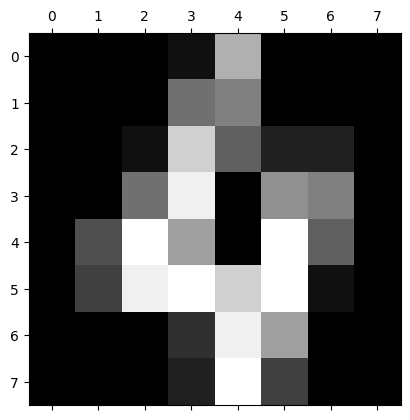

In [74]:
# Plot one sample digit image (reshape feature vector to 8x8 image
plt.gray()
plt.matshow(digits.data[4].reshape(8,8))
plt.show()

## **6. Feature and Target Extraction**

In [75]:
# Indpendent features

X = digits.data

# Dependent features

Y = digits.target

In [76]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [77]:
print(X.shape)

(1797, 64)


In [78]:
print(Y)

[0 1 2 ... 8 9 8]


In [79]:
print(Y.shape)

(1797,)


In [80]:
# Independent columns

x_df = df.drop('Target', axis =1)

In [81]:
# Dependent column

y_df = df['Target']

In [82]:
# Alternatively using DataFrame
x_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [83]:
y_df

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


## **7. Splitting Data into Training and Testing Sets**

In [84]:
# Split the dataset into training (75%) and testing (25%)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

## **8. Feature Scaling**

**StandardScaler()** is a preprocessing tool from scikit-learn that standardizes features by removing the mean and scaling to unit variance (mean of 0 and standard deviation of 1).

In [85]:
#  object to the scaled
scaler = StandardScaler()

In [86]:
# Fit scaler on training data and transform it
x_train = scaler.fit_transform(x_train)

In [87]:
# Transform test data using the same scaler
x_test = scaler.transform(x_test)

In [88]:
x_train.shape

(1347, 64)

## **9. Applying Linear Discriminant Analysis**

* In order to find the number of components required for LDA , we can use a simple formula that is n - 1

* Just assume there are n persons, so , how many lines we would need to distinguish between the given n persons

* If incase , you are having less number of features compared to your class, you need to use min(no of features, no_of_classes -1)

* In this data, we are having 64 features , and number of classes 10.So, In this case we would use **(n-1) = 9**

In [89]:
# Initialize LDA object with the number of components
LDA = LinearDiscriminantAnalysis(n_components = 9)

In [90]:
# Fit LDA on training data and transform it
x_train = LDA.fit_transform(x_train,y_train)

**why reassign to x_train ?**

  we are replacing the high-dimensional features with the *LDA-Reduced Features* for further steps (like classification using a model)


  * fit(x_train,y_train) : learning the best directions (based on the class labels) that seperates the classes

  * transform(x_train) : project the data onto those directions to reduce dimensions

  * fit_transform() : Shortcut for both these steps

In [91]:
y_train

array([5, 2, 0, ..., 2, 7, 1])

In [92]:
# Transform the test data
x_test = LDA.transform(x_test)

In [93]:
# Check new shape of the training data after LDA transformation
print(x_train.shape)
print(x_test.shape)

(1347, 9)
(450, 9)


## **10. Explained Variance Ratio**

In [94]:
# Shows the proportion of class separability explained by each LDA component
LDA.explained_variance_ratio_

array([0.27709518, 0.18867218, 0.17606535, 0.10888121, 0.09038807,
       0.06427354, 0.04249589, 0.03091151, 0.02121708])

In [95]:
# Sum should be close to 1, meaning all class variance is captured
sum(LDA.explained_variance_ratio_)

np.float64(1.0000000000000002)

* LDA.explained_variance_ratio_ - It tells you how much of the total class seperation has been captured by the LDA transformation

* [0.27709518, 0.18867218, 0.17606535, 0.10888121, 0.09038807,0.06427354, 0.04249589, 0.03091151, 0.02121708]

* First component explain 27 % of the class seperability

* Second explain 18% and so on

* Together they explain 100%

## **11. Model Building and Training**

In [96]:
# Initialize Random Forest Classifier
model = RandomForestClassifier()

In [97]:
# Train the model on LDA-transformed training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [98]:
# Predict on test data
pred = model.predict(x_test)

## **12. Model Evaluation**

In [99]:
# Print Accuracy score
print(f"Accuracy score: {accuracy_score(y_test, pred)}")

Accuracy score: 0.9555555555555556


In [100]:
# Confusion matrix to visualize classification performance
print(confusion_matrix(y_test, pred))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  2  0  0  0  0  0  1  0]
 [ 0  0 36  2  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 54  0  0  1  0  0]
 [ 1  0  0  0  0 57  0  0  1  0]
 [ 0  0  0  0  1  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  2  1  0  0  0  2 43]]


In [101]:
# Detailed classification report including precision, recall, f1-score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.97      0.92      0.94        37
           2       0.92      0.95      0.94        38
           3       0.92      0.96      0.94        46
           4       0.95      0.98      0.96        55
           5       0.97      0.97      0.97        59
           6       1.00      0.98      0.99        45
           7       0.98      0.98      0.98        41
           8       0.90      0.95      0.92        38
           9       0.98      0.90      0.93        48

    accuracy                           0.96       450
   macro avg       0.96      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



## **13. Visualization of LDA Components**

In [102]:
import plotly.express as px
import pandas as pd

x_lda = x_train


# Prepare DataFrame for plotting 2D LDA components
df_plot = pd.DataFrame({
    'LD1' : x_lda[:, 0],
    'LD2' : x_lda[:, 1],
    'Class':y_train

})


# 2D Scatter plot of first two LDA components colored by class
fig = px.scatter(df_plot, x = 'LD1', y = 'LD2', color = 'Class',
                 labels = {'LD1': 'LD1', 'LD2': 'LD2'},
                 opacity = 0.8)

fig.update_layout(title = 'LDA Scatter plot', plot_bgcolor = 'white')


# Customize axes appearance
fig.update_xaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                 zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                 showline = True , linewidth = 1 , linecolor = 'black')



fig.update_yaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                 zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                 showline = True , linewidth = 1 , linecolor = 'black')

fig.update_traces(marker=dict(size = 5))
fig.show()

## **14. Visualization of LDA Components: LD1 vs LD9**

In [103]:
import plotly.express as px
import pandas as pd

x_lda = x_train

# Check if 9th component exists, then plot LD1 vs LD9
if x_lda.shape[1] >= 9:
  df_plot = pd.DataFrame({
      'LD1' : x_lda[:, 0],
      'LD9' : x_lda[:, 8],
      'Class':y_train

  })


  fig = px.scatter(df_plot, x = 'LD1', y = 'LD9', color = 'Class',
                  labels = {'LD1': 'LD1', 'LD9': 'LD9'},
                  opacity = 0.8)

  fig.update_layout(title = 'LDA Scatter plot', plot_bgcolor = 'white')


  fig.update_xaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                  zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black')



  fig.update_yaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                  zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black')

  fig.update_traces(marker=dict(size = 5))
  fig.show()
else:
  print("LD9 does not exist")

## **15. 3D Visualization: LD1 vs LD2 vs LD9**

In [104]:
import plotly.express as px
import pandas as pd

x_lda = x_train

if x_lda.shape[1] >= 9:
  df_plot = pd.DataFrame({
      'LD1' : x_lda[:, 0],
      'LD2': x_lda[: ,1],
      'LD9' : x_lda[:, 8],
      'Class':y_train

  })


  fig = px.scatter_3d(df_plot, x = 'LD1', y = 'LD2',z = 'LD9', color = 'Class',
                  labels = {'LD1': 'LD1','LD2':'LD2','LD9': 'LD9'},
                  opacity = 0.8)

  fig.update_layout(title = ' 3D LDA Scatter plot : LD1 vs LD2 vs LD9', plot_bgcolor = 'white')

  fig.update_layout(scene =dict(
      xaxis = dict(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                    zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black'),

      yaxis = dict(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                  zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black'),

      zaxis = dict(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                  zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black'),

      xaxis_title = 'LD1',
      yaxis_title = 'LD2',
      zaxis_title = 'LD9'

  ))


  fig.update_traces(marker=dict(size = 5))
  fig.show()
else:
  print("LD9 does not exist")

# **Conclusion:**

* In this project, we used Linear Discriminant Analysis (LDA) to reduce the number of features in the Digits dataset and then applied a Random Forest Classifier to do multiclass classification.

* LDA reduced the data from **64 features to 9**, keeping the important class-related information.

* The Random Forest model performed very well even after reducing the features, showing **high accuracy of 95.5%**

* The explained variance ratio showed that the 9 LDA components captured almost **100% of the class separability**.

* 2D and 3D plots of LDA components helped us clearly see how well the classes were separated.

* Using LDA helped make the data simpler and faster to work with, without losing accuracy. This shows that LDA is a powerful tool for reducing dimensions in supervised learning tasks.

